# Sine Wave Regression Dataset


This synthetic dataset presents a regression problem based on time steps from a sine wave and a continuous target value. Each sample in the dataset has a unique identifier, a set of time steps (or epochs), and a target value.

The time steps represent sequential observations of a sine function. These observations are continuous values resulting from the sine function, which can range between -1 and 1.

The target value for each sample is the sine value of the point immediately following the last time step. This forms a regression problem, where the task is to predict the next sine value based on the given time steps.

The intervals between the time steps can either be constant for all samples (equidistant intervals) or can vary between samples. When we refer to "varying between samples," it means that the interval length is specific to each sample, but remains constant within that sample. The interval is randomly chosen between \( $\pi$/8 \) and \( $\pi$/4 \) for such samples. This introduces variability in the data and poses challenges in capturing the sequential nature of the sine wave.

To add complexity to the dataset, Gaussian noise is added to each observation, perturbing the sine values and making the prediction task more challenging.

Furthermore, approximately 5\% of the data points in each time step might be replaced with missing values. This simulates real-world scenarios where sequential data might have gaps or missing entries. Handling these missing values becomes crucial for predictive modeling.

The identifiers for the samples are sequential integers, starting from 0. They are used to uniquely identify each sample in the dataset.

In summary, this dataset presents a regression problem, where the task is to predict the next sine value based on given observations from a sine wave. The known mathematical relationship between the time steps, combined with noise and missing values, makes it a challenging task for regression algorithms.



In [24]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
dataset_name = "sine_waves"

In [26]:
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')

# Generation functions

In [27]:
def set_random_seeds(seed: int = 42) -> None:
    """
    Set seeds for reproducibility.

    Args:
        seed (int): The seed value to set for numpy's random operations.
    """
    np.random.seed(seed)

In [39]:
def generate_sine_wave_dataset(
        samples: int = 250, 
        time_steps: int = 10, 
        equidistant: bool = True, 
        noise_std: float = 0.05, 
        missing_prob: float = 0.05
    ) -> pd.DataFrame:
    """
    Generate a synthetic dataset based on sine wave with Gaussian noise and missing values.

    Args:
        samples (int): Number of samples to generate.
        time_steps (int): Number of time steps or epochs for each sample.
        equidistant (bool): Whether to sample points at equal distances for all samples or vary across samples.
        noise_std (float): Standard deviation of Gaussian noise to be added.
        missing_prob (float): Probability of a time step being missing.

    Returns:
        pd.DataFrame: DataFrame with time steps, target column, and a unique ID.
    """

    dataset = []

    # If equidistant is True, set a global step size for all samples
    global_step = np.random.uniform(np.pi/8, np.pi/4) if equidistant else None

    for sample_id in range(samples):
        if not equidistant:
            # Define a random time step for each sample
            step = np.random.uniform(np.pi/8, np.pi/4)
        else:
            step = global_step

        # Generate a starting point randomly
        start = np.random.rand() * 2 * np.pi
        x = np.array([start + i * step for i in range(time_steps + 1)])

        y = np.sin(x)

        # Adding Gaussian noise
        y = y + np.random.normal(0, noise_std, size=y.shape)

        # Introducing missing values with the given probability for the time steps only
        mask = np.random.rand(time_steps) < missing_prob
        y[:-1][mask] = np.nan  # Not affecting the target

        # The target is the sine value of the last point
        target = y[-1]
        time_step_values = y[:-1]

        dataset.append([sample_id] + list(time_step_values) + [target])

    columns = ['sample_id'] + [f'time_step_{i+1}' for i in range(time_steps)] + ['target']
    dataset_df = pd.DataFrame(dataset, columns=columns)

    return dataset_df

# Create Data

In [42]:
# Example of setting random seeds
set_random_seeds(17)

# Just returning the code without executing it
data = generate_sine_wave_dataset(
    samples=250, time_steps=10, equidistant=False, noise_std=0.05,
    missing_prob = 0.05
)

print(data.head())

   sample_id  time_step_1  time_step_2  time_step_3  time_step_4  time_step_5  \
0          0    -0.159806    -0.587408    -0.883406    -0.894938    -0.798608   
1          1    -0.879048    -0.595693    -0.111219     0.284805     0.741500   
2          2     0.051104    -0.559415    -0.884685    -0.979616    -0.683902   
3          3     0.589623     0.992684     0.930968     0.651379    -0.072234   
4          4     0.033547    -0.605922    -0.981180    -0.953283    -0.551214   

   time_step_6  time_step_7  time_step_8  time_step_9  time_step_10    target  
0    -0.414275     0.108334     0.550557     1.007746      1.056075  0.754220  
1     0.924234     0.998702          NaN     0.414577     -0.030452 -0.470011  
2    -0.164116     0.340422     0.798744     1.055758      0.766334  0.361173  
3    -0.721484    -0.984191    -0.874041    -0.410750      0.220960  0.764105  
4    -0.241165     0.443813     0.893067     1.027981      0.798458  0.370477  


# Visualize Data

In [43]:
def plot_sample(dataset_df: pd.DataFrame, sample_id: int) -> None:
    """
    Plot a given sample from the dataset.

    Args:
        dataset_df (pd.DataFrame): The dataset DataFrame.
        sample_id (int): The ID of the sample to be plotted.
    """

    sample_data = dataset_df[dataset_df['sample_id'] == sample_id].iloc[0]
    x = list(range(len(sample_data) - 2))  # Excluding sample_id and target
    y = sample_data[1:-1].values  # Excluding sample_id and target

    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'o-', label='Features')
    plt.plot(len(x), sample_data['target'], 'ro', label='Target')
    plt.title(f'Sample ID: {sample_id}')
    plt.xlabel('Feature Number')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

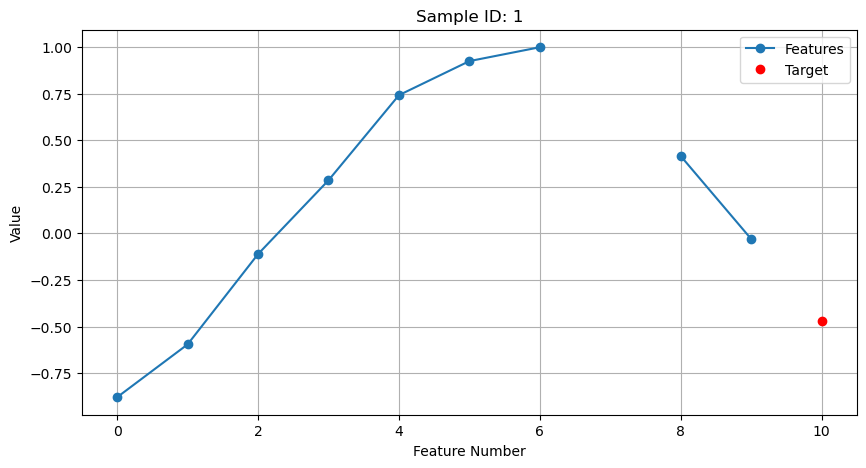

In [44]:
plot_sample(data, sample_id=1)

# Save Main Data File

In [46]:
data.to_csv(outp_fname, index=False, float_format="%.4f")